# Librerias y funciones

In [1]:
# Importaciones de bibliotecas necesarias
import pandas as pd  # Pandas para manipulación de datos tabulares
import json  # Módulo para trabajar con JSON
import ast  # Módulo para evaluar expresiones literales de Python
import re  # Módulo para trabajar con expresiones regulares
from textblob import TextBlob # Importa la clase TextBlob desde la biblioteca TextBlob
import nltk # Importa la biblioteca nltk (Natural Language Toolkit)
import csv # Importa el módulo csv en Python

# Habilita la recarga automática de módulos antes de ejecutar una celda
%load_ext autoreload
%autoreload 2

# Importa el módulo de advertencias y configura para ignorar todas las advertencias
import warnings
warnings.filterwarnings("ignore")

In [2]:
def verificar_tipo_datos(df):

    #Se crea un diccionario (mi_dict) con cinco claves: "nombre_campo", "tipo_datos", "no_nulos_%", "nulos_%", y "nulos". Estas claves se utilizarán para almacenar información sobre cada columna del DataFrame.
    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    #Se realiza un bucle sobre todas las columnas del DataFrame df.
    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

        # Se calcula el porcentaje de valores no nulos en la columna actual (porcentaje_no_nulos).
        # La columna actual se agrega a la lista bajo la clave "nombre_campo".
        # Se obtiene el tipo de datos único en la columna actual y se agrega a la lista bajo la clave "tipo_datos".
        # Se agrega el porcentaje de valores no nulos a la lista bajo la clave "no_nulos_%".
        # Se agrega el porcentaje de valores nulos a la lista bajo la clave "nulos_%".
        # Se agrega la cantidad de valores nulos en la columna actual a la lista bajo la clave "nulos".

    # Se utiliza el diccionario mi_dict para crear un nuevo DataFrame llamado df_info.
    df_info = pd.DataFrame(mi_dict)

    # La función devuelve el DataFrame df_info que contiene información sobre cada columna, incluidos el nombre de la columna, el tipo de datos, el porcentaje de valores no nulos, el porcentaje de valores nulos y la cantidad de valores nulos.
    return df_info

In [3]:
def verifica_duplicados_por_columna(df, columna):

    # Se filtran las filas duplicadas
    duplicated_rows = df[df.duplicated(subset=columna, keep=False)]
    if duplicated_rows.empty:
        return "No hay duplicados"

    # se ordenan las filas duplicadas para comparar entre sí
    duplicated_rows_sorted = duplicated_rows.sort_values(by=columna)
    return duplicated_rows_sorted

# Preparación `df_reviews`

In [4]:
with open(r'/content/drive/MyDrive/HENRY/2_Dataset_limpio/Australian_user_reviews_limpio.csv', 'r') as file:
    csv_file = csv.DictReader(file)
    df_reviews = pd.DataFrame(csv_file)

In [5]:
verificar_tipo_datos(df_reviews)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,[<class 'str'>],100.0,0.0,0
1,user_url,[<class 'str'>],100.0,0.0,0
2,reviews_item_id,[<class 'str'>],100.0,0.0,0
3,reviews_helpful,[<class 'str'>],100.0,0.0,0
4,reviews_recommend,[<class 'str'>],100.0,0.0,0
5,reviews_date,[<class 'str'>],100.0,0.0,0
6,sentiment_analysis,[<class 'str'>],100.0,0.0,0


In [6]:
df_reviews.sample(5,random_state=5)

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,reviews_date,sentiment_analysis
27494,EngesDesTodes,http://steamcommunity.com/id/EngesDesTodes,730,No ratings yet,True,2014-12-13,1
52469,76561198064427658,http://steamcommunity.com/profiles/76561198064...,233720,No ratings yet,True,2014-03-22,2
36290,littlekillerkalf,http://steamcommunity.com/id/littlekillerkalf,12200,No ratings yet,True,2014-03-17,1
47041,Loadingdotdotdot,http://steamcommunity.com/id/Loadingdotdotdot,270630,No ratings yet,True,Formato inválido,2
9662,chopochop,http://steamcommunity.com/id/chopochop,8170,0 of 2 people (0%) found this review helpful,True,2014-07-04,1


Cambio la el nombre de la columna `reviews_item_id` a `item_id`

In [7]:
# Cambiar el nombre de una columna
nuevo_nombre = 'item_id'
df_reviews = df_reviews.rename(columns={'reviews_item_id': nuevo_nombre})

Cuento en la columna `reviews_date` cuantos "Formato inválido" hay.

In [8]:
# Contar el número de ocurrencias de "Dato no disponible" en la columna release_anio
cuenta_dato_a_buscar = (df_reviews['reviews_date'] == 'Formato inválido').sum()

# Imprimir el resultado
print(f'Número de veces que aparece: {cuenta_dato_a_buscar}')

Número de veces que aparece: 9768


A fines prácticos cambio los "Formato inválido" por la fecha 2014-03-17

In [9]:
# Reemplazar "Dato no disponible" con 0 en la columna release_anio
df_reviews['reviews_date'].replace('2015', '2014-03-17', inplace=True)

# Preparación `df_games`

In [10]:
with open(r'/content/drive/MyDrive/HENRY/2_Dataset_limpio/Output_steam_games_limpio.csv', 'r') as file:
    csv_file = csv.DictReader(file)
    df_games = pd.DataFrame(csv_file)

In [11]:
verificar_tipo_datos(df_games)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,genres,[<class 'str'>],100.0,0.0,0
1,price,[<class 'str'>],100.0,0.0,0
2,early_access,[<class 'str'>],100.0,0.0,0
3,id,[<class 'str'>],100.0,0.0,0
4,release_anio,[<class 'str'>],100.0,0.0,0
5,publisher,[<class 'str'>],100.0,0.0,0
6,app_name,[<class 'str'>],100.0,0.0,0
7,title,[<class 'str'>],100.0,0.0,0
8,developer,[<class 'str'>],100.0,0.0,0


In [12]:
df_games.sample(5,random_state=5)

,genres,price,early_access,id,release_anio,publisher,app_name,title,developer
9793,Simulation,4.99,False,368230,2015,Raw Fury,Kingdom: Classic,Kingdom: Classic,"Noio,Licorice"
29858,Simulation,2.99,False,637802,2017,Sin dato disponible,Rocksmith® 2014 Edition – Remastered – Alice i...,Rocksmith® 2014 Edition – Remastered – Alice i...,Ubisoft - San Francisco
41055,RPG,2.99,False,608200,2017,Sin dato disponible,Fantasy Grounds - Mini-Dungeon #025: The Choke...,Fantasy Grounds - Mini-Dungeon #025: The Choke...,"SmiteWorks USA, LLC"
42178,Action,4.99,False,416530,2017,Cherry Pie Games,Tacopocalypse,Tacopocalypse,Cherry Pie Games
3952,Racing,4.99,False,279520,2014,Plug In Digital,Rage Runner,Rage Runner,Hypercane Studios


Cambio la el nombre de la columna `id` a `item_id`

In [13]:
# Cambiar el nombre de una columna
nuevo_nombre = 'item_id'
df_games = df_games.rename(columns={'id': nuevo_nombre})

# Preparación `df_items`

In [14]:
with open(r'/content/drive/MyDrive/HENRY/2_Dataset_limpio/Australian_users_items_limpio.csv', 'r') as file:
    csv_file = csv.DictReader(file)
    df_items = pd.DataFrame(csv_file)

In [15]:
verificar_tipo_datos(df_items)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'str'>],100.0,0.0,0
1,item_name,[<class 'str'>],100.0,0.0,0
2,playtime_forever,[<class 'str'>],100.0,0.0,0
3,steam_id,[<class 'str'>],100.0,0.0,0
4,items_count,[<class 'str'>],100.0,0.0,0
5,user_id,[<class 'str'>],100.0,0.0,0
6,user_url,[<class 'str'>],100.0,0.0,0


In [16]:
df_items.sample(5,random_state=5)

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
712918,233720,Surgeon Simulator,355,76561198069744476,101,bl00dlock,http://steamcommunity.com/id/bl00dlock
4648151,205790,Dota 2 Test,0,76561198067869898,93,76561198067869898,http://steamcommunity.com/profiles/76561198067...
2757740,285580,ACE - Arena: Cyber Evolution,0,76561198050861063,187,76561198050861063,http://steamcommunity.com/profiles/76561198050...
713376,32420,STAR WARS™: The Clone Wars - Republic Heroes™,0,76561198083573232,256,BlackTheKing,http://steamcommunity.com/id/BlackTheKing
3733342,250380,Knock-knock,0,76561197973612806,661,gbl_scarface,http://steamcommunity.com/id/gbl_scarface


# 1° Endpoint

---



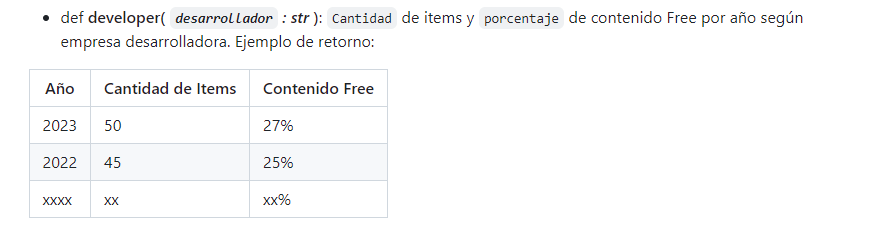

Creo un dataframe auxiliar para el endpoint1 llamado df_end1

In [17]:
# Crear el nuevo DataFrame df_end1_a con las columnas seleccionadas
df1_aux_1 = df_games[['developer', 'item_id', 'price', 'release_anio']]

In [18]:
df1_aux_1.sample(10,random_state=15)

,developer,item_id,price,release_anio
52600,Minddesk Software GmbH,456231,9.99,2016
2941,Exor Studios,220825,1.99,2013
52864,Choice of Games,459330,0.99,2016
27143,Ubisoft Montreal,662352,6.99,2017
32008,Wurd Industries,488480,4.99,2017
4336,SCS Software,304213,0.99,2014
6197,Battenberg Software,341090,3.99,2015
33379,Dave Gumble,717190,0.0,2017
51234,Handelabra Games Inc.,467516,4.99,2016
68286,Stoic,234023,9.99,2013


In [19]:
# Contar el número de ocurrencias de "Dato no disponible" en la columna release_anio
cuenta_dato_a_buscar = (df1_aux_1['release_anio'] == 'Dato no disponible').sum()

# Imprimir el resultado
print(f'Número de veces que aparece: {cuenta_dato_a_buscar}')

Número de veces que aparece: 850


In [20]:
# Reemplazar "Dato no disponible" con 2011 en la columna release_anio
df1_aux_1['release_anio'].replace('Dato no disponible', '2011', inplace=True)

Agrego la columna `items_total` y `items_free`


In [21]:
import pandas as pd

df = pd.DataFrame(df1_aux_1)

# Convertir la columna 'price' a cadena para comparar con '0.00'
df['price'] = df['price'].astype(str)

# Agrupar por desarrollador y año, y contar la cantidad total de items y la cantidad de items gratuitos
df1_aux_2 = df.groupby(['developer', 'release_anio']).agg(
    items_total=('item_id', 'count'),
    items_free=('price', lambda x: (x == '0.0').sum())
).reset_index()

df1_aux_2


,developer,release_anio,items_total,items_free
0,+7 Software,2016,4,0
1,"+Mpact Games, LLC.",2017,3,0
2,.M.Y.W.,2016,2,0
3,.ez Games,2017,5,0
4,07th Expansion,2015,2,0
...,...,...,...,...
15027,萌石游戏,2017,4,0
15028,高考恋爱委员会,2015,4,4
15029,"高考恋爱委员会,Days",2015,4,0
15030,"高考恋爱委员会,橘子班",2015,4,0


Agrego la columna `percentage_free` por año

In [22]:
import pandas as pd

df1_aux_3 = pd.DataFrame(df1_aux_2)

# Calcular el porcentaje de items gratuitos en el total y agregar el signo '%'
df1_aux_3['percentage_free'] = (df1_aux_3['items_free'] / df1_aux_3['items_total']) * 100
df1_aux_3['percentage_free'] = df1_aux_3['percentage_free'].map('{:.2f}%'.format)

df1_aux_3.reset_index(drop=True)


,developer,release_anio,items_total,items_free,percentage_free
0,+7 Software,2016,4,0,0.00%
1,"+Mpact Games, LLC.",2017,3,0,0.00%
2,.M.Y.W.,2016,2,0,0.00%
3,.ez Games,2017,5,0,0.00%
4,07th Expansion,2015,2,0,0.00%
...,...,...,...,...,...
15027,萌石游戏,2017,4,0,0.00%
15028,高考恋爱委员会,2015,4,4,100.00%
15029,"高考恋爱委员会,Days",2015,4,0,0.00%
15030,"高考恋爱委员会,橘子班",2015,4,0,0.00%


Guardo el dataset para ser consumido por la funcion del endpoint 1

In [23]:
dataset_endpoint_1 = df1_aux_3

In [24]:
# Especifica la dirección donde deseas guardar el archivo CSV
direccion_guardado = '//content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/dataset_endpoint_1.csv'

# Guarda el DataFrame como un archivo CSV en la dirección especificada
dataset_endpoint_1.to_csv(direccion_guardado, index=False)


# 2° Endpoint

---



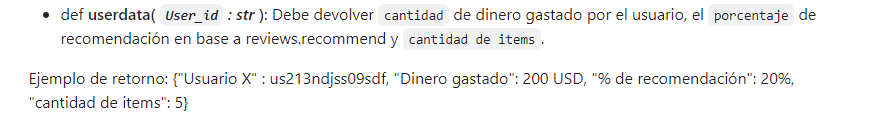

Genero dataframes auxiliares

In [25]:
# Selecciona columnas para crear un nuevo DataFrame
columnas_seleccionadas = ['item_id', 'price']
df2_aux_1 = df_games[columnas_seleccionadas]
df2_aux_1.sample(5,random_state=5).reset_index(drop=True)

,item_id,price
0,368230,4.99
1,637802,2.99
2,608200,2.99
3,416530,4.99
4,279520,4.99


In [26]:
# Convertir la columna 'price' a tipo de datos float
df2_aux_1['price'] = df2_aux_1['price'].astype(float)

In [27]:
# Selecciona columnas para crear un nuevo DataFrame
columnas_seleccionadas = ['item_id', 'items_count', 'user_id']
df2_aux_2 = df_items[columnas_seleccionadas]
df2_aux_2.sample(5,random_state=5).reset_index(drop=True)

,item_id,items_count,user_id
0,233720,101,bl00dlock
1,205790,93,76561198067869898
2,285580,187,76561198050861063
3,32420,256,BlackTheKing
4,250380,661,gbl_scarface


In [28]:
# Convertir la columna 'price' a tipo de datos float
df2_aux_2['items_count'] = df2_aux_2['items_count'].astype(float)

Hago un merge entre los dos dataframes `df2_aux_1` y `df2_aux_2`

In [29]:
# Hacer el merge por item_id
df2_aux_3 = pd.merge(df2_aux_1, df2_aux_2, on='item_id', how='left')

# Eliminar filas con valores nulos
df2_aux_3 = df2_aux_3.dropna()

In [30]:
df2_aux_3.sample(5,random_state=5)

,item_id,price,items_count,user_id
7217813,239070,9.99,288.0,Animax117
8212896,212680,9.99,91.0,freeman259
3320684,375950,0.00,100.0,litzzer
1233779,200210,0.00,186.0,steamxanbunny
7533559,230410,0.00,18.0,76561198084486777


Creo la columna `cantidad total gastado` para saber cuanto gasto cada usuario

In [31]:
# Crear la columna "cantidad total gastado"
df2_aux_3['cantidad total gastado'] = df2_aux_3['price'] * df2_aux_3['items_count']

In [32]:
df2_aux_3.sample(5,random_state=5).reset_index(drop=True)

,item_id,price,items_count,user_id,cantidad total gastado
0,239070,9.99,288.0,Animax117,2877.12
1,212680,9.99,91.0,freeman259,909.09
2,375950,0.00,100.0,litzzer,0.00
3,200210,0.00,186.0,steamxanbunny,0.00
4,230410,0.00,18.0,76561198084486777,0.00


Empezamos a trabajar con la columna `reviews_recommend ` para saber que porcentaje de usuarios recomiendan juegos

In [33]:
# Selecciona columnas para crear un nuevo DataFrame
columnas_seleccionadas = ['user_id', 'reviews_recommend']
df2_aux_4 = df_reviews[columnas_seleccionadas]
df2_aux_4.sample(5,random_state=3).reset_index(drop=True)

,user_id,reviews_recommend
0,76561198067070151,True
1,overrusedmale,True
2,IAMYOUDIDYOUKNOWTHAT,False
3,094553552,True
4,76561198045768753,True


Verificamos la columna `reviews_recommend` y vemos que tipo de valores tiene

In [34]:
valores_unicos = df2_aux_4['reviews_recommend'].unique()

valores_unicos

array(['True', 'False', ''], dtype=object)

Vemos que hay valores vacios, lo pasamos a "False" asumiendo que el usuario no hizo una recomendación

In [35]:
df2_aux_4['reviews_recommend'] = df2_aux_4['reviews_recommend'].replace({'True': True, 'False': False, '': False}).astype(bool)


Pasamos todos los valores a booleanos

In [36]:
df2_aux_4['reviews_recommend'] = df2_aux_4['reviews_recommend'].astype(bool)


Vemos finalmente que solo queda False y True.

In [37]:
valores_unicos = df2_aux_4['reviews_recommend'].unique()

valores_unicos

array([ True, False])

 Luego verificamos el tipo de dato de la columna.

In [38]:
valores_unicos.dtype

dtype('bool')

Tomamos una muestra

In [39]:
df2_aux_4.sample(10,random_state=3).reset_index(drop=True)

,user_id,reviews_recommend
0,76561198067070151,True
1,overrusedmale,True
2,IAMYOUDIDYOUKNOWTHAT,False
3,094553552,True
4,76561198045768753,True
5,Bush_Maori,True
6,ItzABitRisky,True
7,76561198078377030,True
8,76561198100170399,True
9,76561198091646080,True


Trabajamos el dataframe para ver los porcentajes de true de cada usuario

In [40]:
df2_aux_5 = pd.DataFrame(df2_aux_4)

# Convertir la columna 'reviews_recommend' a tipo booleano
df2_aux_5['reviews_recommend'] = df2_aux_5['reviews_recommend'].astype(bool)

# Crear columnas 'total_true' y 'total_false'
df2_aux_5['total_true'] = df2_aux_5['reviews_recommend'].astype(int)
df2_aux_5['total_false'] = (~df2_aux_5['reviews_recommend']).astype(int)

# Agrupar por 'user_id' y sumar las columnas correspondientes
df2_aux_6 = df2_aux_5.groupby('user_id').agg({'total_true': 'sum', 'total_false': 'sum'})

# Crear la columna 'total_recommend'
df2_aux_6['total_recommend'] = df2_aux_6['total_true'] + df2_aux_6['total_false']

# Crear la columna 'percentage_true' y agregar el signo de porcentaje
df2_aux_6['percentage_true'] = (df2_aux_6['total_true'] / df2_aux_6['total_recommend']) * 100
df2_aux_6['percentage_true'] = df2_aux_6['percentage_true'].map('{:.2f}%'.format)

df2_aux_6.sample(10,random_state=3)

,total_true,total_false,total_recommend,percentage_true
user_id,,,,
chuecola,1,0,1,100.00%
76561198059989388,2,0,2,100.00%
SyberSybus,1,0,1,100.00%
76561198084127598,2,2,4,50.00%
76561198078387492,1,0,1,100.00%
Acroxian,2,0,2,100.00%
Armedxxp,2,0,2,100.00%
76561198072782328,1,0,1,100.00%
76561198089540481,1,0,1,100.00%


Vemos como queda nuestro dataframe con el porcentaje de recomendaciones de los usuarios

In [41]:
df2_aux_6.sample(10,random_state=3)

,total_true,total_false,total_recommend,percentage_true
user_id,,,,
chuecola,1,0,1,100.00%
76561198059989388,2,0,2,100.00%
SyberSybus,1,0,1,100.00%
76561198084127598,2,2,4,50.00%
76561198078387492,1,0,1,100.00%
Acroxian,2,0,2,100.00%
Armedxxp,2,0,2,100.00%
76561198072782328,1,0,1,100.00%
76561198089540481,1,0,1,100.00%


Uno los dos dataframes para formar el dataframe final

In [42]:
# Realizar el merge
df2_aux_7 = pd.merge(df2_aux_3, df2_aux_6, on='user_id', how='inner')

# Mostrar el DataFrame resultante
df2_aux_7.sample(5,random_state=5)


,item_id,price,items_count,user_id,cantidad total gastado,total_true,total_false,total_recommend,percentage_true
5045922,304930,0.00,21.0,LypheLife,0.00,1,0,1,100.00%
1665262,267980,9.99,675.0,76561198001296435,6743.25,5,1,6,83.33%
4991534,238320,19.99,84.0,GamekungX,1679.16,2,0,2,100.00%
1937571,204300,0.00,209.0,76561198059866467,0.00,6,1,7,85.71%
999003,224600,0.00,341.0,76561198001398677,0.00,1,0,1,100.00%


In [43]:
# Mostrar el DataFrame resultante
df2_aux_7.sample(5,random_state=5)

,item_id,price,items_count,user_id,cantidad total gastado,total_true,total_false,total_recommend,percentage_true
5045922,304930,0.00,21.0,LypheLife,0.00,1,0,1,100.00%
1665262,267980,9.99,675.0,76561198001296435,6743.25,5,1,6,83.33%
4991534,238320,19.99,84.0,GamekungX,1679.16,2,0,2,100.00%
1937571,204300,0.00,209.0,76561198059866467,0.00,6,1,7,85.71%
999003,224600,0.00,341.0,76561198001398677,0.00,1,0,1,100.00%


Borro las columnas que no me sirven `total_true`, `total_false`, `total recommend`, `price` e `item_count`

In [44]:
# Lista de columnas a borrar
columns_to_drop = ['price', 'items_count', 'total_true', 'total_false', 'total_recommend']

# Borrar las columnas
df2_aux_7 = df2_aux_7.drop(columns=columns_to_drop)

In [45]:
# Mostrar el DataFrame resultante
df2_aux_7.sample(5,random_state=5)

,item_id,user_id,cantidad total gastado,percentage_true
5045922,304930,LypheLife,0.00,100.00%
1665262,267980,76561198001296435,6743.25,83.33%
4991534,238320,GamekungX,1679.16,100.00%
1937571,204300,76561198059866467,0.00,85.71%
999003,224600,76561198001398677,0.00,100.00%


Guardo el dataset para ser consumido por la funcion del endpoint 2


In [46]:
dataset_endpoint_2 = df2_aux_7

# Especifica la dirección donde deseas guardar el archivo CSV
direccion_guardado = '//content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/dataset_endpoint_2.csv'

# Guarda el DataFrame como un archivo CSV en la dirección especificada
dataset_endpoint_2.to_csv(direccion_guardado, index=False)

# 3° Endpoint

---



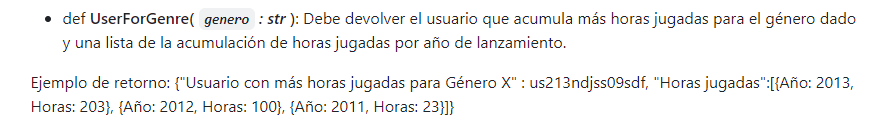

Preparo df auxiliares que saco de `df_games`

In [47]:
# Selecciona columnas para crear un nuevo DataFrame
columnas_seleccionadas = ['genres', 'item_id', 'release_anio']
df3_aux_1 = df_games[columnas_seleccionadas]
df3_aux_1.sample(5,random_state=5).reset_index(drop=True)

,genres,item_id,release_anio
0,Simulation,368230,2015
1,Simulation,637802,2017
2,RPG,608200,2017
3,Action,416530,2017
4,Racing,279520,2014


Preparo df auxiliares que saco de `df_items`

In [48]:
# Selecciona columnas para crear un nuevo DataFrame
columnas_seleccionadas = ['item_id', 'playtime_forever', 'user_id']
df3_aux_2 = df_items[columnas_seleccionadas]
df3_aux_2.sample(5,random_state=5).reset_index(drop=True)

,item_id,playtime_forever,user_id
0,233720,355,bl00dlock
1,205790,0,76561198067869898
2,285580,0,76561198050861063
3,32420,0,BlackTheKing
4,250380,0,gbl_scarface


Junto los dos dataframe `df3_aux_1` y `df3_aux_2` con la funcion merge a traves de `item_id`

In [49]:
# Merge basado en la columna 'item_id'
df3_aux_3 = pd.merge(df3_aux_2, df3_aux_1[['item_id', 'genres']], on='item_id', how='left')


In [50]:
df3_aux_3.sample(5,random_state=5)

,item_id,playtime_forever,user_id,genres
2505249,400,0,iCrashPlanes,Action
10311275,9480,101,76561198083531438,Action
6419902,265630,351,rewfifa,Action
7803838,107410,429,76561197981780630,Simulation
7976905,236830,114,76561198019298308,NaN


Verifico tipos de datos

In [51]:
verificar_tipo_datos(df3_aux_3)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'str'>],100.00,0.00,0
1,playtime_forever,[<class 'str'>],100.00,0.00,0
2,user_id,[<class 'str'>],100.00,0.00,0
3,genres,"[<class 'str'>, <class 'float'>]",91.33,8.67,937657


Busco en la columna `genres` los valores nulos y los elimino

In [52]:
# Eliminar filas con valores nulos en la columna 'genres'
df3_aux_3 = df3_aux_3.dropna(subset=['genres'])

Vuelvo a comprobar y no hay mas datos nulos

In [53]:
verificar_tipo_datos(df3_aux_3)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'str'>],100.0,0.0,0
1,playtime_forever,[<class 'str'>],100.0,0.0,0
2,user_id,[<class 'str'>],100.0,0.0,0
3,genres,[<class 'str'>],100.0,0.0,0


Veo un ejemplo de `df3_aux_3`

In [54]:
df3_aux_3.sample(5,random_state=5)

,item_id,playtime_forever,user_id,genres
7828933,301520,1416,76561198086554859,Simulation
8927343,209270,0,76561198042743118,Strategy
3616572,301520,43,76561198007864600,Action
1345510,63000,804,76561198045684734,Indie
8176484,409670,15,76561197986591060,Action


Sumamos al dataframe la columna `release_anio`

In [55]:
# Combinar ambos DataFrames en base a la columna "item_id"
df3_aux_4 = pd.merge(df3_aux_3, df3_aux_1[['item_id', 'release_anio']], on='item_id', how='left')

In [56]:
# Mostrar el DataFrame resultante
df3_aux_4.sample(5,random_state=5)

,item_id,playtime_forever,user_id,genres,release_anio
6741256,301520,88,alimkusing,RPG,2017
12884260,293540,380,76561198057233213,Action,2014
3366057,104900,851,SealSAURUS,Indie,2013
16985442,236090,0,kayne110,Adventure,2013
15129825,433850,45,76561198046378596,Early Access,2016


Verificamos los datos de este dataframe

In [57]:
verificar_tipo_datos(df3_aux_4)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'str'>],100.0,0.0,0
1,playtime_forever,[<class 'str'>],100.0,0.0,0
2,user_id,[<class 'str'>],100.0,0.0,0
3,genres,[<class 'str'>],100.0,0.0,0
4,release_anio,[<class 'str'>],100.0,0.0,0


Busco en la columna playtime_forever que solo hayan numero nada mas

In [58]:
# Contar cuántas veces aparece "Dato no disponible" en la columna 'playtime_forever'
contador_dato_no_disponible = (df3_aux_4['playtime_forever'] == 'Dato no disponible').sum()

# Imprimir el resultado
print(f"Se encontró 'Dato no disponible' {contador_dato_no_disponible} veces en la columna 'playtime_forever'")

Se encontró 'Dato no disponible' 0 veces en la columna 'playtime_forever'


Paso a tipo de dato entero la columna playtime_forever

In [59]:
# Convertir la columna 'playtime_forever' a tipo int
df3_aux_4['playtime_forever'] = df3_aux_4['playtime_forever'].astype(int)

Vemos como queda finalmente nuestro dataframe y listo para guardar

In [60]:
verificar_tipo_datos(df3_aux_4)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'str'>],100.0,0.0,0
1,playtime_forever,[<class 'int'>],100.0,0.0,0
2,user_id,[<class 'str'>],100.0,0.0,0
3,genres,[<class 'str'>],100.0,0.0,0
4,release_anio,[<class 'str'>],100.0,0.0,0


Guardo el dataset para ser consumido por la funcion del endpoint 3


In [61]:
dataset_endpoint_3 = df3_aux_4

# Especifica la dirección donde deseas guardar el archivo CSV
direccion_guardado = '//content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/dataset_endpoint_3.csv'

# Guarda el DataFrame como un archivo CSV en la dirección especificada
dataset_endpoint_3.to_csv(direccion_guardado, index=False)

# 4° Endpoint

---



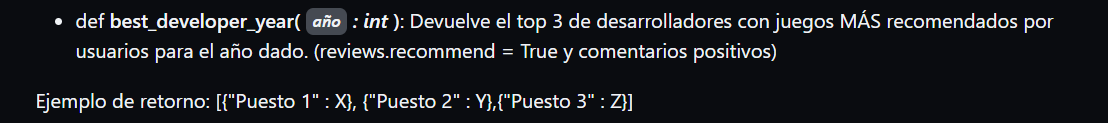

Preparo df auxiliares que saco de `df_reviews`

In [62]:
# Selecciona columnas para crear un nuevo DataFrame
columnas_seleccionadas = ['item_id', 'reviews_recommend', 'sentiment_analysis']
df4_aux_1 = df_reviews[columnas_seleccionadas]
df4_aux_1.sample(5,random_state=5).reset_index(drop=True)

,item_id,reviews_recommend,sentiment_analysis
0,730,True,1
1,233720,True,2
2,12200,True,1
3,270630,True,2
4,8170,True,1


Preparo df auxiliares que saco de `df_games`

In [63]:
# Selecciona columnas para crear un nuevo DataFrame
columnas_seleccionadas = ['item_id', 'release_anio', 'developer']
df4_aux_2 = df_games[columnas_seleccionadas]
df4_aux_2.sample(5,random_state=5).reset_index(drop=True)

,item_id,release_anio,developer
0,368230,2015,"Noio,Licorice"
1,637802,2017,Ubisoft - San Francisco
2,608200,2017,"SmiteWorks USA, LLC"
3,416530,2017,Cherry Pie Games
4,279520,2014,Hypercane Studios


In [64]:
# Realizar el merge y eliminar filas con valores nulos
df4_aux_3 = pd.merge(df4_aux_1, df4_aux_2, on='item_id', how='inner').dropna()

In [65]:
# Reiniciar el índice
df4_aux_3.reset_index(drop=True, inplace=True)

df4_aux_3.sample(5,random_state=5)

,item_id,reviews_recommend,sentiment_analysis,release_anio,developer
60657,22380,True,1,2010,Obsidian Entertainment
120227,318520,True,1,2014,SCS Software
56921,208090,True,2,2014,Edge of Reality
93879,219890,True,1,2013,Alexander Bruce
88094,200260,True,2,2012,"Rocksteady Studios,Feral Interactive (Mac)"


Verificamos el tipo de datos y vemos que release_anio es str y tiene que ser int

In [66]:
verificar_tipo_datos(df4_aux_3)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'str'>],100.0,0.0,0
1,reviews_recommend,[<class 'str'>],100.0,0.0,0
2,sentiment_analysis,[<class 'str'>],100.0,0.0,0
3,release_anio,[<class 'str'>],100.0,0.0,0
4,developer,[<class 'str'>],100.0,0.0,0


Buscamos en la columna release_anio la palabra "Dato no disponible" y borramos esas filas

In [67]:
# Contar las filas que contienen "Dato no disponible" en la columna 'release_anio'
df_buscador = df4_aux_3[df4_aux_3['release_anio'] == 'Dato no disponible'].shape[0]

# Imprimir el número de filas con "Dato no disponible"
print(f"Número de filas con 'Dato no disponible' en release_anio: {df_buscador}")

Número de filas con 'Dato no disponible' en release_anio: 640


In [68]:
# Reemplazar "Dato no disponible" con NaN y luego eliminar filas con NaN en la columna 'release_anio'
df4_aux_3['release_anio'] = df4_aux_3['release_anio'].replace('Dato no disponible', pd.NA)
df4_aux_4 = df4_aux_3.dropna(subset=['release_anio'])

In [69]:
df4_aux_4.sample(5,random_state=5)

,item_id,reviews_recommend,sentiment_analysis,release_anio,developer
45540,301520,False,1,2017,Freejam
65401,220240,True,2,2012,"Ubisoft Montreal, Massive Entertainment, and U..."
47264,301520,True,1,2017,Freejam
28825,113200,True,1,2011,Edmund McMillen and Florian Himsl
12651,440,True,2,2007,Valve


Verificamos tipo de datos

In [70]:
verificar_tipo_datos(df4_aux_4)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'str'>],100.0,0.0,0
1,reviews_recommend,[<class 'str'>],100.0,0.0,0
2,sentiment_analysis,[<class 'str'>],100.0,0.0,0
3,release_anio,[<class 'str'>],100.0,0.0,0
4,developer,[<class 'str'>],100.0,0.0,0


Cambiamos el tipo de datos de release_anio

In [71]:
# Convertir la columna 'release_anio' a tipo int
df4_aux_4['release_anio'] = df4_aux_4['release_anio'].astype(int)

Solo dejamos las columnas `'release_anio'`, `'sentiment_analysis'`, `'developer'`

In [72]:
df4_aux_5 = df4_aux_4[['release_anio', 'sentiment_analysis', 'developer']]

Vemos un ejemplo final antes de guardar

In [73]:
df4_aux_5.sample(5,random_state=5)

,release_anio,sentiment_analysis,developer
45540,2017,1,Freejam
65401,2012,2,"Ubisoft Montreal, Massive Entertainment, and U..."
47264,2017,1,Freejam
28825,2011,1,Edmund McMillen and Florian Himsl
12651,2007,2,Valve


Verificamos el tipo de datos nuevamente de la columna release_anio y lo guardamos

In [74]:
verificar_tipo_datos(df4_aux_5)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,release_anio,[<class 'int'>],100.0,0.0,0
1,sentiment_analysis,[<class 'str'>],100.0,0.0,0
2,developer,[<class 'str'>],100.0,0.0,0


Cambiamos a tipo de datos a `int` en la columna `sentiment_analysis`

In [75]:
# Cambiar el tipo de datos de la columna "mi_columna" a entero
df4_aux_5['sentiment_analysis'] = df4_aux_5['sentiment_analysis'].astype(int)

In [76]:
verificar_tipo_datos(df4_aux_5)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,release_anio,[<class 'int'>],100.0,0.0,0
1,sentiment_analysis,[<class 'int'>],100.0,0.0,0
2,developer,[<class 'str'>],100.0,0.0,0


In [77]:
df4_aux_5.sample(5,random_state=5)

,release_anio,sentiment_analysis,developer
45540,2017,1,Freejam
65401,2012,2,"Ubisoft Montreal, Massive Entertainment, and U..."
47264,2017,1,Freejam
28825,2011,1,Edmund McMillen and Florian Himsl
12651,2007,2,Valve


Guardo el dataset para ser consumido por la funcion del endpoint 4


In [78]:
dataset_endpoint_4 = df4_aux_5

# Especifica la dirección donde deseas guardar el archivo CSV
direccion_guardado = '//content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/dataset_endpoint_4.csv'

# Guarda el DataFrame como un archivo CSV en la dirección especificada
dataset_endpoint_4.to_csv(direccion_guardado, index=False)

# 5° Endpoint

---



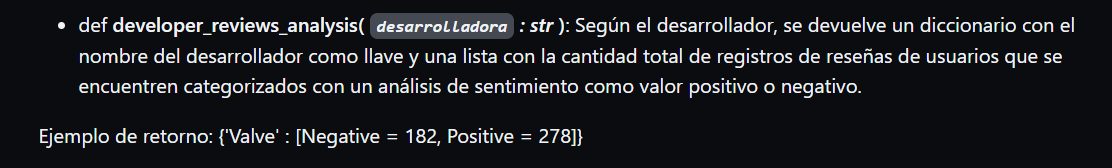

Preparo df auxiliares que saco de `df_reviews`

In [97]:
# Selecciona columnas para crear un nuevo DataFrame
columnas_seleccionadas = ['item_id', 'sentiment_analysis']
df5_aux_1 = df_reviews[columnas_seleccionadas]
df5_aux_1.sample(5,random_state=5).reset_index(drop=True)

,item_id,sentiment_analysis
0,730,1
1,233720,2
2,12200,1
3,270630,2
4,8170,1


Preparo df auxiliares que saco de `df_games`

In [98]:
# Selecciona columnas para crear un nuevo DataFrame
columnas_seleccionadas = ['item_id', 'developer']
df5_aux_2 = df_games[columnas_seleccionadas]
df5_aux_2.sample(5,random_state=5).reset_index(drop=True)

,item_id,developer
0,368230,"Noio,Licorice"
1,637802,Ubisoft - San Francisco
2,608200,"SmiteWorks USA, LLC"
3,416530,Cherry Pie Games
4,279520,Hypercane Studios


In [99]:
# Realizar el merge
df5_aux_3 = pd.merge(df5_aux_1, df5_aux_2, on='item_id')

# Reiniciar el índice
df5_aux_3.reset_index(drop=True, inplace=True)

# Eliminar filas con valores nulos o vacíos
df5_aux_3.dropna(inplace=True)

df5_aux_3.sample(5)


,item_id,sentiment_analysis,developer
119317,269490,2,TreeFortress Games
44937,346110,2,"Studio Wildcard,Instinct Games,Efecto Studios,..."
48117,365450,1,Team Fractal Alligator
50762,271590,2,Rockstar North
60965,107410,1,Bohemia Interactive


Paso los valores de sentiment_analysis a enteros

In [100]:
# Convertir la columna 'release_anio' a tipo int
df5_aux_3['sentiment_analysis'] = df5_aux_3['sentiment_analysis'].astype(int)

Como solo necesitamos los valores 0 (negativo) y 2 (positivo). Borramos las filas con valores en 1 (neutro)

In [105]:
# Filtrar y eliminar las filas con 'sentiment_analysis' igual a 1
df5_aux_4 = df5_aux_3[df5_aux_3['sentiment_analysis'] != 1].reset_index(drop=True)

# Imprimir el DataFrame resultante
df5_aux_4.sample(5)


,item_id,sentiment_analysis,developer
18404,301520,2,Freejam
33150,286080,2,Stridemann
10670,221100,2,Bohemia Interactive
1438,730,0,Valve
37439,296970,2,Abbey Games


Solamente dejo las columnas `sentiment_analysis` y `developer`

In [107]:
df5_aux_5 = df5_aux_4[['sentiment_analysis', 'developer']]

Reviso los valores de sentiment_analysis

In [108]:
verificar_tipo_datos(df5_aux_5)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,sentiment_analysis,[<class 'int'>],100.0,0.0,0
1,developer,[<class 'str'>],100.0,0.0,0


Guardo el dataset para ser consumido por la funcion del endpoint 5


In [109]:
dataset_endpoint_5 = df5_aux_5

# Especifica la dirección donde deseas guardar el archivo CSV
direccion_guardado = '//content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/dataset_endpoint_5.csv'

# Guarda el DataFrame como un archivo CSV en la dirección especificada
dataset_endpoint_5.to_csv(direccion_guardado, index=False)

# 6° Pasar todo a formato parquet

In [86]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('/content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/dataset_endpoint_1.csv')

# Especificar la ruta del archivo Parquet de salida
archivo_parquet = '/content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/Dataset_endpoints_formato_parquet/dataset_endpoint_1.parquet'

# Guardar el DataFrame en formato Parquet
df.to_parquet(archivo_parquet, index=False)

print(f'Archivo Parquet guardado en: {archivo_parquet}')

Archivo Parquet guardado en: /content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/Dataset_endpoints_formato_parquet/dataset_endpoint_1.parquet


In [87]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('/content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/dataset_endpoint_2.csv')

# Especificar la ruta del archivo Parquet de salida
archivo_parquet = '/content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/Dataset_endpoints_formato_parquet/dataset_endpoint_2.parquet'

# Guardar el DataFrame en formato Parquet
df.to_parquet(archivo_parquet, index=False)

print(f'Archivo Parquet guardado en: {archivo_parquet}')

Archivo Parquet guardado en: /content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/Dataset_endpoints_formato_parquet/dataset_endpoint_2.parquet


In [88]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('/content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/dataset_endpoint_3.csv')

# Especificar la ruta del archivo Parquet de salida
archivo_parquet = '/content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/Dataset_endpoints_formato_parquet/dataset_endpoint_3.parquet'

# Guardar el DataFrame en formato Parquet
df.to_parquet(archivo_parquet, index=False)

print(f'Archivo Parquet guardado en: {archivo_parquet}')

Archivo Parquet guardado en: /content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/Dataset_endpoints_formato_parquet/dataset_endpoint_3.parquet


In [89]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('/content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/dataset_endpoint_4.csv')

# Especificar la ruta del archivo Parquet de salida
archivo_parquet = '/content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/Dataset_endpoints_formato_parquet/dataset_endpoint_4.parquet'

# Guardar el DataFrame en formato Parquet
df.to_parquet(archivo_parquet, index=False)

print(f'Archivo Parquet guardado en: {archivo_parquet}')

Archivo Parquet guardado en: /content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/Dataset_endpoints_formato_parquet/dataset_endpoint_4.parquet


In [95]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('/content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/dataset_endpoint_5.csv')

# Especificar la ruta del archivo Parquet de salida
archivo_parquet = '/content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/Dataset_endpoints_formato_parquet/dataset_endpoint_5.parquet'

# Guardar el DataFrame en formato Parquet
df.to_parquet(archivo_parquet, index=False)

print(f'Archivo Parquet guardado en: {archivo_parquet}')

Archivo Parquet guardado en: /content/drive/MyDrive/HENRY/3_Dataset_para_fastAPI/Dataset_endpoints_formato_parquet/dataset_endpoint_5.parquet
